# Task #1 

A template code for training an RBM on H$_2$ data for $r = 1.2$ is shown here. Modify this!

Imports and loading in data:

In [1]:
!pip install torch

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import H2_energy_calculator
from RBM_helper import RBM

In [3]:
energies = np.zeros([1,53])

for i in range(53):
  if i % 2 == 0:
    R_i = round(0.2 + 0.05*i, 2)
  else:
    R_i = round(0.2 + 0.05*i, 1)
  training_data = torch.from_numpy(np.loadtxt(f"H2_data/R_{(R_i)}_samples.txt"))
  coeff = np.loadtxt("H2_data/H2_coefficients.txt")[20,:]
  true_energy = H2_energy_calculator.energy_from_freq(training_data, coeff)
  print("H2 energy for r =",round(0.2 + 0.05*i, 2),":",true_energy)
  n_vis = 2
  n_hin = 10
  rbm = RBM(n_vis, n_hin)
  epochs = 400 # number of training steps
  num_samples = 1000 # number of samples to generate from the RBM to calculate the H2 energy
  true_energy = H2_energy_calculator.energy_from_freq(training_data, coeff)
  print("True energy: ",true_energy)

  for e in range(1, epochs+1):
      # do one epoch of training
      rbm.train(training_data)   
      # now generate samples and calculate the energy
      if e % 100 == 0:
          print("\nEpoch: ", e)
          print("Sampling the RBM...")
          # For sampling the RBM, we need to do Gibbs sampling.
          # Initialize the Gibbs sampling chain with init_state as defined below.
          init_state = torch.zeros(num_samples, n_vis)
          RBM_samples = rbm.draw_samples(15, init_state)
          print("Done sampling. Calculating energy...")       
          energies[0, i] = H2_energy_calculator.energy(RBM_samples, coeff, rbm.wavefunction) 
          print("Energy from RBM samples: ", energies[0, i].item())

H2 energy for r = 0.2 : -1.0272612255781348
True energy:  -1.0272612255781348

Epoch:  100
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -1.006476823066262

Epoch:  200
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -1.010257474109587

Epoch:  300
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -1.0075996870167025

Epoch:  400
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -1.0116358943933892
H2 energy for r = 0.25 : -1.0272612255781348
True energy:  -1.0272612255781348

Epoch:  100
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -1.0091785037620777

Epoch:  200
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -1.0129866344424034

Epoch:  300
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -1.0115076567596148

Epoch:  400
Sampling the RBM...


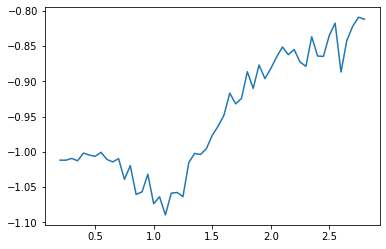

In [4]:
plt.plot(np.arange(0.2,2.85,0.05).reshape(-1,1),energies.T)